In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext google.colab.data_table

In [2]:
#reading url
url1 = 'https://raw.githubusercontent.com/Miriam-Alfred/Winc_Python/main/gdp-per-capita-worldbank.csv'
gdp = pd.read_csv(url1, encoding='latin-1')

url2 = 'https://raw.githubusercontent.com/Miriam-Alfred/Winc_Python/main/inequality.csv'
gc = pd.read_csv(url2, encoding='latin-1')

In [ ]:
# cleaning the column to the only needed ones
gc_clean = gc.iloc[:,:3]
gc_columnRename = {'Gini coefficient (before tax) (World Inequality Database)': 'Gini_coefficient'}
gc_clean.rename(columns=gc_columnRename, inplace=True)
## droping Nan rows because will be irrelevant
gc_clean = gc_clean.dropna(subset=['Gini_coefficient'])
gc_clean

In [15]:
# Renaming the columns in gdp
column_names = {'Entity':'Country', 'Code': 'Country_Code', 'GDP per capita, PPP (constant 2017 international $)': 'GDP'}
gdp.rename(columns = column_names, inplace=True)

In [ ]:
gdp.info()

In [ ]:
gc_clean.info()

In [18]:
# merging the two df to make the calculations
gdp_gc = pd.merge(gdp, gc_clean, on=['Country', 'Year'], how='left')

In [ ]:
gdp_gc.info()

In [ ]:
gdp_gc_clean = gdp_gc.dropna(subset=['GDP','Gini_coefficient'])
gdp_gc_clean

In [47]:
gdp_gc_clean.corr()
## from here we can see there is not a correlation but it can be because all countries are included.

<ipython-input-47-b2ebc3bcba6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gdp_gc_clean.corr()


,Year,GDP,Gini_coefficient
Year,1.000000,0.123149,0.139110
GDP,0.123149,1.000000,-0.464863
Gini_coefficient,0.139110,-0.464863,1.000000


In [ ]:
# Next step is to check if there is correlation per country

countries = gdp_gc_clean['Country'].unique()

for country in countries:
    country_data = gdp_gc_clean[gdp_gc_clean['Country'] == country]
    correlation_coefficient = country_data['GDP'].corr(country_data['Gini_coefficient'])
    print(f"Correlation coefficient for {country}: {correlation_coefficient}")

 ## From this results it seems that there is correlation between some countries

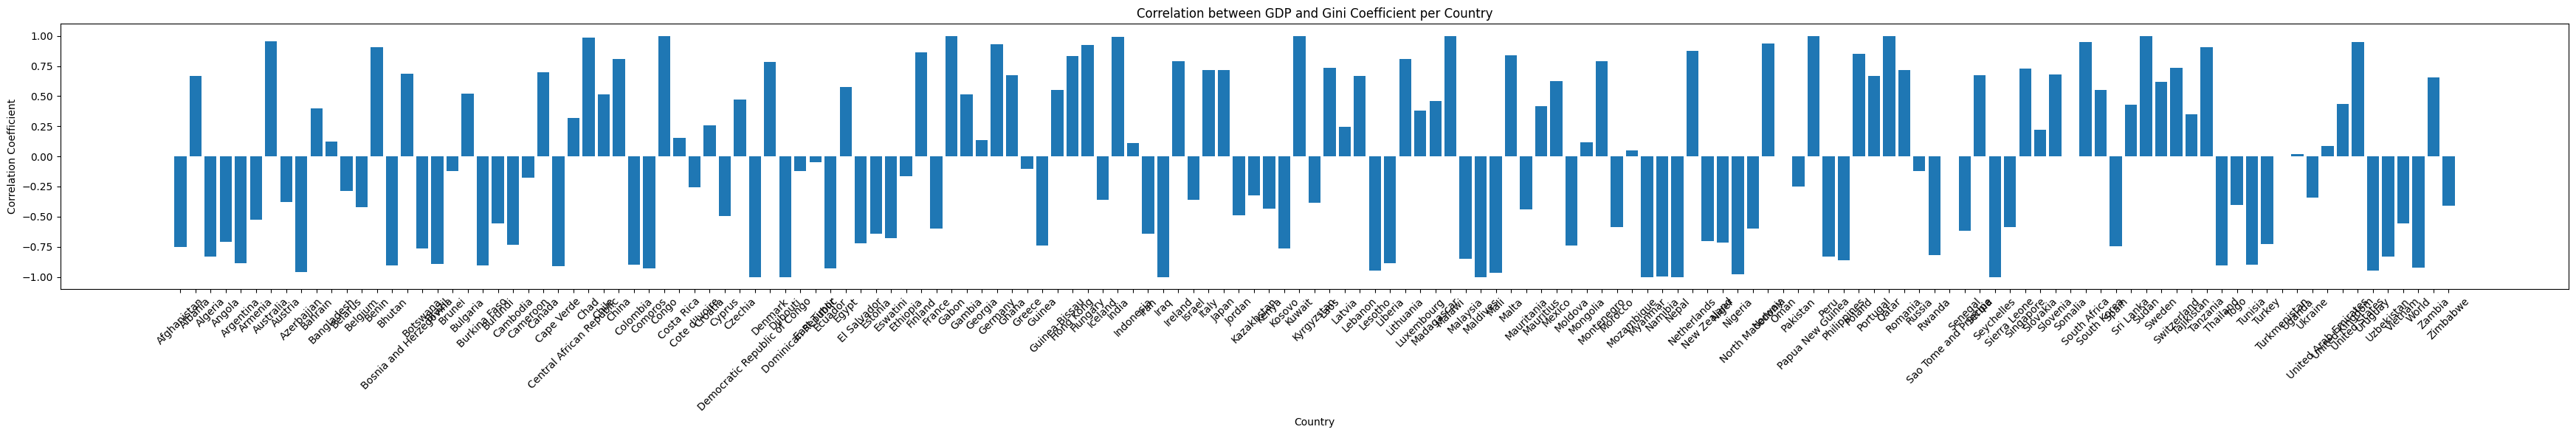

In [52]:
#plot the results

countries = gdp_gc_clean['Country'].unique()
correlation_coefficients = []

for country in countries:
    country_data = gdp_gc_clean[gdp_gc_clean['Country'] == country]
    correlation_coefficient = country_data['GDP'].corr(country_data['Gini_coefficient'])
    correlation_coefficients.append(correlation_coefficient)

# Create a bar plot
plt.figure(figsize=(35, 6))
plt.bar(countries, correlation_coefficients)
plt.title('Correlation between GDP and Gini Coefficient per Country')
plt.xlabel('Country')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# from the plot below it is not possiable to check the results clearly but it gives an idea that some countries has positive correlation and others negative.

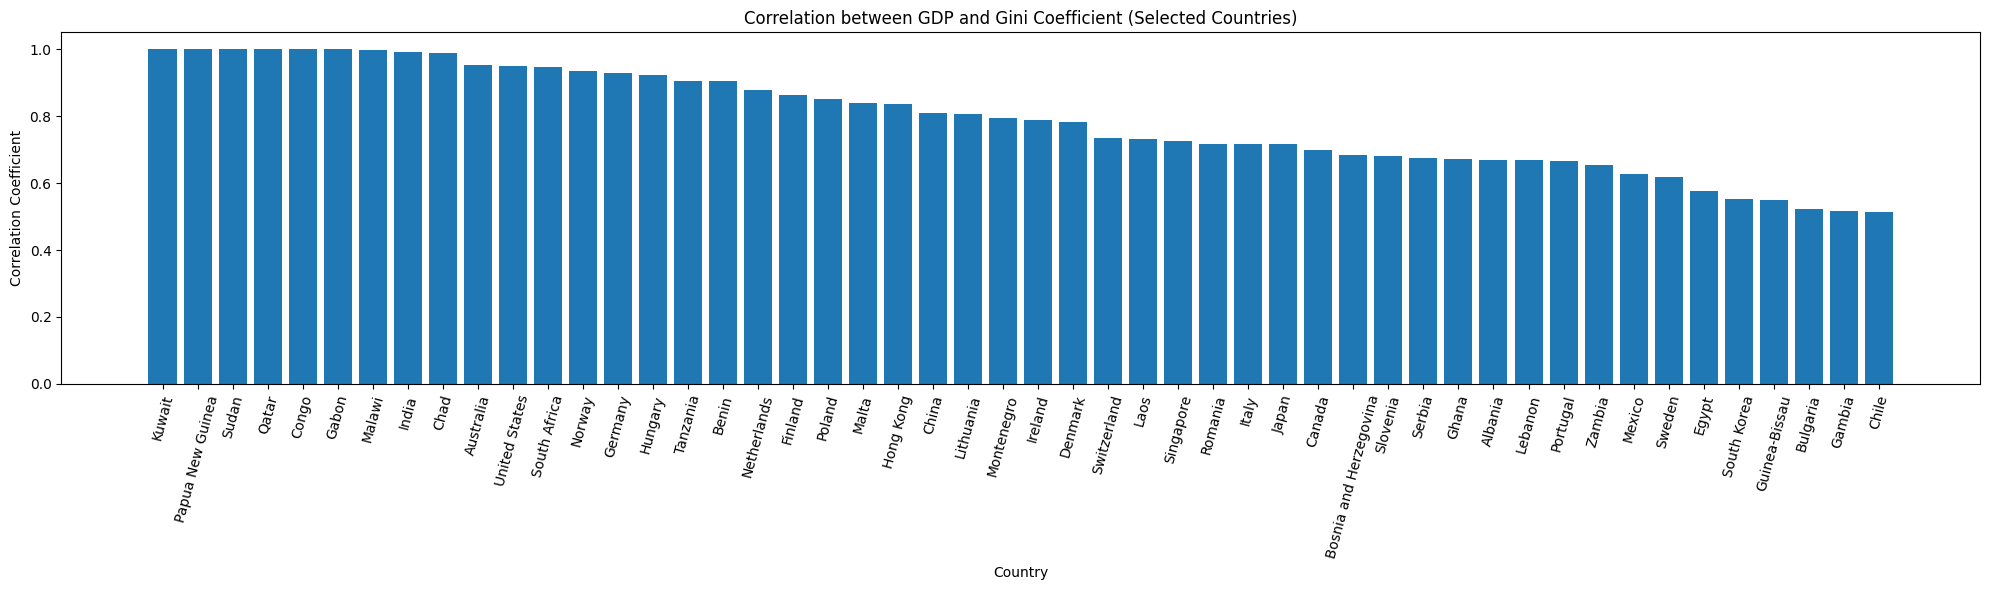

In [68]:
## Plot countries with positive correlation between GPD and Gini Coefficient. (choose dor corr > 0.5)

countries = gdp_gc_clean['Country'].unique()
correlation_coefficients = {}

for country in countries:
    country_data = gdp_gc_clean[gdp_gc_clean['Country'] == country]
    correlation_coefficient = country_data['GDP'].corr(country_data['Gini_coefficient'])
    correlation_coefficients[country] = correlation_coefficient

# Separate countries with correlation > 0.5
selected_countries = {country: corr for country, corr in correlation_coefficients.items() if corr > 0.5}

sorted_countries = dict(sorted(selected_countries.items(), key=lambda item: item[1], reverse=True))

# Create a bar plot for selected countries
plt.figure(figsize=(20, 6))
plt.bar(sorted_countries.keys(), sorted_countries.values())
plt.title('Correlation between GDP and Gini Coefficient (Selected Countries)')
plt.xlabel('Country')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation= 75)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


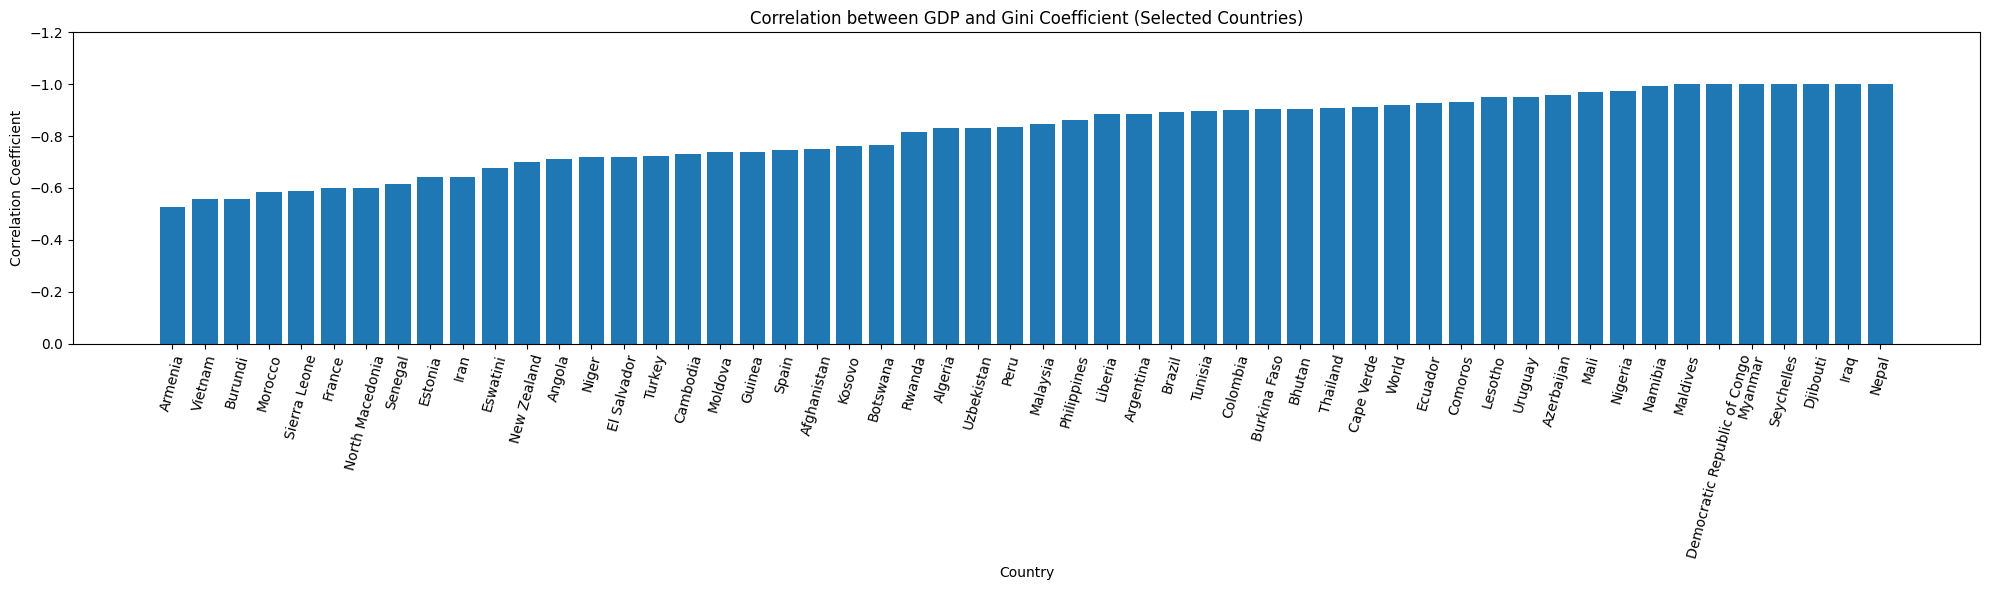

In [67]:
## Plot countries with negative correlation between GPD and Gini Coefficient. (choose dor corr < - 0.5)

countries = gdp_gc_clean['Country'].unique()
correlation_coefficients = {}

for country in countries:
    country_data = gdp_gc_clean[gdp_gc_clean['Country'] == country]
    correlation_coefficient = country_data['GDP'].corr(country_data['Gini_coefficient'])
    correlation_coefficients[country] = correlation_coefficient

# Separate countries with correlation > 0.5
selected_countries_negative = {country: corr for country, corr in correlation_coefficients.items() if corr < -0.5}

sorted_countries_negative = dict(sorted(selected_countries_negative.items(), key=lambda item: item[1], reverse=True))

# Create a bar plot for selected countries
plt.figure(figsize=(20, 6))
plt.bar(sorted_countries_negative.keys(), sorted_countries_negative.values())
plt.title('Correlation between GDP and Gini Coefficient (Selected Countries)')
plt.xlabel('Country')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation= 75)
plt.ylim(0, -1.2) ## choose to switch it for better reading
plt.tight_layout()
plt.show()

In conclusion, the relationship between Gross Domestic Product (GDP) and income inequality varies across countries. Certain countries exhibit a positive correlation, indicating that as GDP increases, income inequality also tends to rise. Conversely, in some countries, there is a negative correlation, suggesting that higher GDP is associated with reduced income inequality.
It's worth noting that some countries may not show a clear correlation, which could be attributed to the limitations of available data for those regions.